# The Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
import pickle

# Read Data

In [5]:
Graph = nx.read_edgelist('Data/facebookData.txt',create_using=nx.Graph(),nodetype=int)

In [6]:
#Read our decision Matrix
data = pd.read_csv("Data/Matrix.csv")
data.head(10)

,Node,DC,BC,CC,EC
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07
5,5,0.003219,2.205964e-06,0.261308,1.183322e-06
6,6,0.001486,2.453776e-08,0.261190,2.170904e-07
7,7,0.004953,1.702985e-04,0.274769,2.568510e-05
8,8,0.001981,2.760498e-07,0.261224,2.197375e-07
9,9,0.014116,1.645424e-05,0.262055,2.214117e-06


# Building adjacency matrix

In [7]:
edge_mat= nx.to_numpy_array(Graph, nodelist=[i for i in range(4039)])
edge_mat

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
# Adjancy Matrix of top K-nodes
influential = pd.read_csv("Data/res.csv").head(10)
topKnodes = influential['Node'].tolist()
edge_mat[topKnodes]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# K-Means Application

In [9]:
k_clusters = 10
results = []

model = KMeans(n_clusters=k_clusters, n_init=1, init=edge_mat[topKnodes])

In [11]:
model = model.fit(edge_mat)
results = list(model.labels_)

In [20]:
centr = model.cluster_centers_
centr

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.73472348e-18,  8.67361738e-19, ...,
        -4.33680869e-19, -8.67361738e-19,  2.60208521e-18],
       [ 9.14859863e-02,  4.23056584e-03,  2.37969328e-03, ...,
         5.28820730e-04,  1.05764146e-03,  2.37969328e-03],
       [ 4.16333634e-17,  1.73472348e-18,  1.30104261e-18, ...,
        -2.16840434e-19, -4.33680869e-19,  4.33680869e-19]])

In [11]:
#convert to DataFrame
labM = pd.DataFrame(results, columns=['center'])
labM

,center
0,4
1,8
2,8
3,8
4,8
...,...
4034,8
4035,8
4036,8
4037,8


In [12]:
#Community of each Node
Node = pd.DataFrame([i for i in range(4039)], columns=['Node'])
cM = pd.concat([Node, labM], axis=1)
cM.head(1000)

,Node,center
0,0,4
1,1,8
2,2,8
3,3,8
4,4,8
...,...,...
995,995,8
996,996,8
997,997,8
998,998,8


In [13]:
gM = cM.groupby('center')
gM.first()

,Node
center,
0,107
1,1684
2,1912
3,3437
4,0
5,1085
6,686
7,348
8,1


In [14]:
ccM = []
for i in range(10):
    ccM.append(gM.get_group(i)['Node'].tolist())
ccM

[[107],
 [1684],
 [1912],
 [3437],
 [0],
 [1085],
 [686,
  687,
  688,
  693,
  694,
  695,
  696,
  697,
  698,
  701,
  703,
  705,
  706,
  708,
  709,
  711,
  713,
  718,
  719,
  722,
  724,
  726,
  727,
  728,
  731,
  734,
  737,
  738,
  739,
  741,
  745,
  747,
  748,
  752,
  754,
  755,
  758,
  760,
  762,
  764,
  766,
  770,
  772,
  773,
  774,
  777,
  778,
  779,
  780,
  781,
  784,
  787,
  792,
  797,
  800,
  805,
  807,
  810,
  814,
  815,
  817,
  819,
  820,
  823,
  824,
  827,
  828,
  829,
  830,
  831,
  834,
  835,
  838,
  840,
  842,
  844,
  845,
  847,
  848,
  849,
  853,
  856],
 [348,
  360,
  368,
  370,
  373,
  374,
  376,
  378,
  387,
  388,
  391,
  392,
  394,
  395,
  397,
  398,
  400,
  402,
  404,
  408,
  409,
  412,
  414,
  417,
  419,
  420,
  422,
  423,
  428,
  430,
  431,
  432,
  434,
  436,
  438,
  439,
  444,
  451,
  452,
  456,
  460,
  461,
  463,
  465,
  471,
  473,
  475,
  479,
  482,
  487,
  488,
  492,
  493,
  49

# Community Graph

In [50]:
with open('Data/networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

In [51]:
size=[]
for i in range(10):
    sslist=[]
    for j in ccM[i]:
        list1=[107,1684,1912,3437,0,1085,698,567,58,428]
        if j in list1:
            sslist.append(3150)
        else:
            sslist.append(70)
    size.append(sslist)

In [52]:
keyList = influential.Node.tolist()
myDict = {key: key for key in keyList}

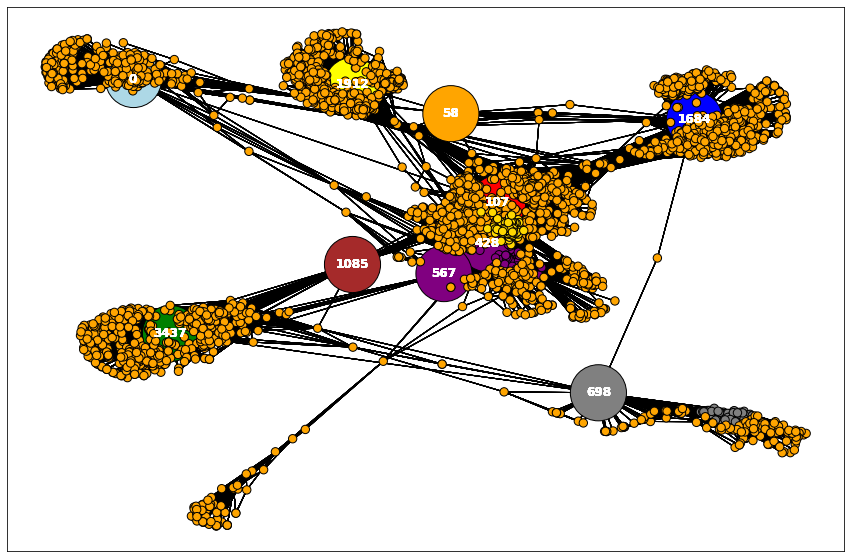

In [57]:
plt.rcParams.update({'figure.figsize': (15, 10)})
colors=['red','blue','yellow','green','lightblue','brown','grey','purple','orange','gold','olive', 'pink']
for i in range(10):
    nx.draw_networkx(Graph, pos=pos, nodelist=ccM[i], node_color= colors[i],with_labels=False,node_size=size[i], font_size=8,
        edgecolors='black')
    labels=nx.draw_networkx_labels(Graph,pos = pos, labels=myDict, font_color='w',font_weight='bold')

# Plot the communities

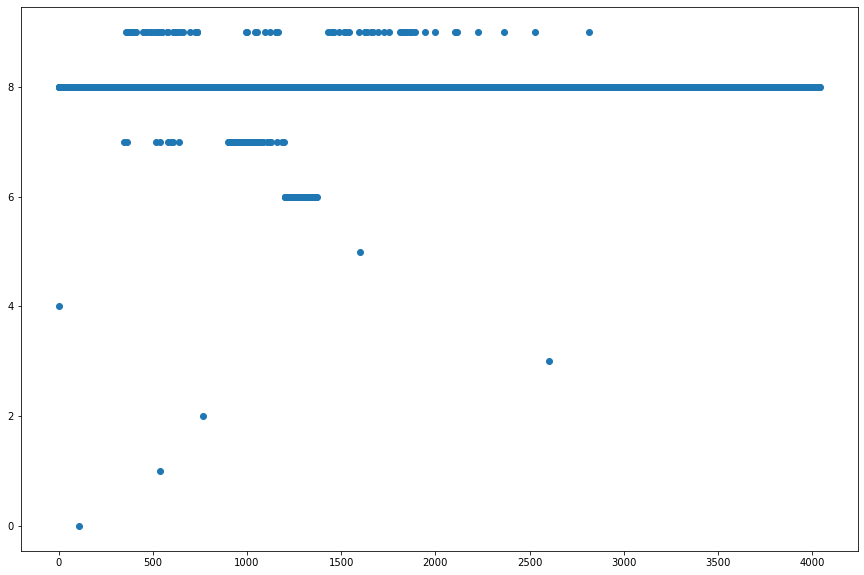

In [36]:
plt.scatter(cM['Node'], cM['center'])
plt.show()